# Лабораторная работа №1 «Численное решение дифференциальных уравнений»



## Вступление

В первой лабораторной Вашей задачей будет изучить и реализовать различные методы для численного решения дифференциальных уравнений.

Наверное, из курса физики Вы успели заметить, что дифференциальные уравнения появляются при описании явлений современного мира практически повсеместно, и практически никогда эти уравнения невозможно разрешить даже в квадратурах (выразив $y(x)$ через элементарные функции и интегралы от них).

Однако, физическими задачами уже никого не удивить, а уравнение движения маятника Вам уже, наверное, набило оскомину. Да и складывающееся ощущение, что дифференциальные уравнения возникают только лишь в задачах естествознания, ошибочно. Чтобы показать это, в качестве задачи в данной лабораторной работе рассматривается интересный пример использования дифференциальных уравнений в задачах искусственного интеллекта. *Неожиданно?!* Давайте разбираться.

## Задание 1. Численное решение дифференциального уравнения первого порядка.

Прежде чем приступить к интеллекту искусственному, применим интеллект естественный для реализации функций численного решения дифференциальных уравнений.


### Описание задачи

Так как дальше нам понадобится решать систему уравнений, то сразу будем решать задачу Коши
$$
\begin{cases} x(t)' = f(t, x(t)),\\ x(t_0) = x_0 \end{cases} \quad \text{где } x,x_0 \in \mathbb{R}^n, \ t \in [t_0,T].
$$

Рассмотрим два, наверное, самых распространенных метода:
- Метод ломаных Эйлера,
- Метод Рунге—Кутты.

Импортируем необходимые нам далее библиотеки.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### Метод ломаных Эйлера

Метод Эйлера — это канонический и, честно говоря, простейший численный метод для решения дифференциальных уравнений. Мы будем искать приближение решения в виде ломаной. Для того, чтобы построить ломаную, нужно найти координаты ее вершин, этим и займемся.



##### Теоретические выкладки

Зададим на отрезке $[t_0, T]$ некоторое разбиение $\big\{t_m\big\}_{m=0}^M$.

Пусть $\varphi(t)$ — истинное решение. Разложим функцию$^*$ $\varphi(t)$ по Тейлору в точке $t_k ,\;  k \in \{0,1,\dots,M-1\}$:
$$
\varphi(t) = \varphi(t_k) + (t-t_k)\cdot \varphi'(t_k) + \mathrm{\overline o}\left(t-t_k\right).
$$
Подставим $t=t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k)  + \mathrm{\overline o}\left(t_{k+1}-t_k \right).
$$
Обозначим $h_k = t_{k+1} - t_k$ и обрубим наше разложение, отбросив о-малое. Тогда
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot \varphi'(t_k)
$$
— приближенное значение $\varphi(t_{k+1})$, $\psi(t_0) = x_0$.

Так как $\varphi(t)$ — решение уравнения $x'=f(t,x)$, то $\varphi'(t) = f(t, \varphi(t))$, а значит
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot f(t_k, \varphi(t_k)).
$$
Так как $\psi(t_k)$ — приближенное значение $\varphi (t_k)$, то, с некоторой потерей точности, в правой части можем заменить все $\varphi(t_k)$ на $\psi(t_k)$.

Тогда получаем множество упорядоченных вершин ломаной Эйлера:
$$\boxed{\psi(t_{k+1}) = \psi(t_k) + h_k \cdot f(t_k, \psi(t_k)), \quad \psi(t_0) = x_0}$$

Тогда для построения приближенного решения задачи Коши достаточно запустить вычисление вплоть до $\psi(t_M)$.

Более подробно, а именно: то, почему метод сходится, какая погрешность получается и т.д., обсуждалось на практических занятиях.

<sub>* В случае, когда у нас система уравнений, то есть $x$ является вектором, просто проделываем данные рассуждения  покомпонентно.</sub>

##### Реализация метода

Реализуйте метод ломаных Эйлера для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Euler_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

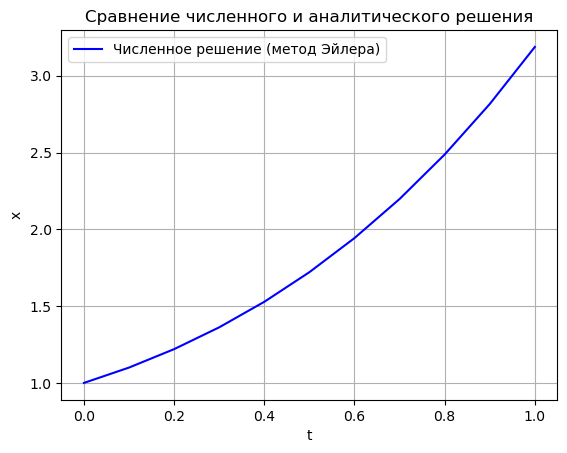

In [74]:
'''
Реализация метода ломаных Эйлера в функции Euler_method
'''

def Euler_method(fun, t, x_0, dt, args={}):
    """
    fun — функция правой части уравнения
    t — начальное и конечное время в формате [t0, t1]
    x_0 — начальное состояние (скаляр или вектор)
    dt —  величина  ℎ𝑘
    args — словарь с аргументами для функции fun
    """
    # Количество шагов
    n_steps = int((t[1] - t[0]) / dt)
    
    # Инициализация массивов
    t_values = np.linspace(t[0], t[1], n_steps + 1)
    
    # Проверка, скалярная ли система
    if isinstance(x_0, (int, float)):  # Скалярная система
        x_values = np.zeros(n_steps + 1)  # Одномерный массив для хранения чисел
    else:  # Векторная система
        x_0 = np.array(x_0)  # Убедимся, что это numpy.array
        x_values = np.zeros((n_steps + 1, len(x_0)))  # Многомерный массив для векторов
    # Установка начальных условий
    x_values[0] = x_0
    # Применение метода Эйлера
    for i in range(n_steps):
        t_curr = t_values[i]
        x_curr = x_values[i]
        x_values[i + 1] = x_curr + dt * fun(t_curr, x_curr, **args)
    
    return t_values, x_values

# Чисто для себя проверил что функция работает
# Задайте функцию для правой части дифференциального уравнения dy/dx = x + y
def f(x, y):
    return x + y


# Параметры задачи
t = [0, 1] 
x0 = 1  # Начальное условие  # Конечное значение x
h = 0.1  # Шаг

# Численное решение методом Эйлера
t_values, x_numerical = Euler_method(f, t, x0, h)

# Аналитическое решение


# Построение графиков
plt.plot(t_values, x_numerical, 'b-', label='Численное решение (метод Эйлера)')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Сравнение численного и аналитического решения')
plt.legend()
plt.grid(True)
plt.show()

#### Метод Рунге-Кутты

Теперь рассмотрим не столько геометрически понятный, но достаточно часто применяемый на практике метод Рунге—Кутты, ограничившись лишь вторым порядком последнего.

##### Теоретические выкладки

Так как $\varphi$ — решение исходной задачи Коши, то $\varphi'(t) = f(t, \varphi(t))$, а также
$$
\varphi''(t) = \frac{d}{d t} f(t, \varphi(t)) = \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} \frac{d\varphi(t)}{dt}= \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} f(t,\varphi(t)).
$$

Аналогично тому, что делали ранее, воспользуемся разложением Тейлора на отрезке в точке $t_k$ и подставим точку $t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \varphi''(t_k) + \mathrm{\overline o}\left((t_{k+1}-t_k)^2\right).
$$
Отбросим слагаемое с о-малым, тем самым переходя к приближению $\psi$ функции $\varphi$; подставим выражения для $\varphi'$, $\varphi''$. Получим
$$
\psi(t_{k+1}) = \psi(t_k) + (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \left.\left(f'_t(t, \psi) + f'_\psi(t, \psi) f(t,\psi(t))\right)\right|_{(t_k, \psi(t_k))}. \tag{o}
$$

Запишем теперь разложение Тейлора функции двух переменных $f(t,\psi)$ в точке $(t_k, \psi(t_k))$ и подставим точку $\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big)$, где $\alpha > 0$ --- параметр метода,
$$
f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big) \approx f(t_k, \psi(t_k)) + \alpha(t_{k+1}-t_k)f'_t(t_k, \psi(t_k)) + \alpha(t_{k+1} - t_k)  f(t_k, \psi(t_k))f'_\psi(t_k, \psi(t_k)).
$$

Заметим, что это очень похоже на правую часть в выражении (o). Тогда, домножив на $\frac{1}{2\alpha} (t_{k+1}-t_k)$, получим
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2\alpha}(t_{k+1} - t_k) f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big).
$$

Или, вводя обозначение длины шага $h_k = t_{k+1} - t_k$, получаем итерационную схему для метода Рунге—Кутты 2-ого порядка
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) h_k \cdot \underbrace{f(t_k, \psi(t_k))}_{k_1} + \frac{1}{2\alpha} h_k \cdot  \underbrace{f\big(t_{k}+\alpha h_k, \psi(t_{k})+ \alpha h_k f(t_k, \psi(t_k))\big)}_{k_2},
$$
Переобозначив под более принятые обозначения, получим
$$
\boxed{
    \begin{split}
        &\psi(t_{k+1}) = \psi(t_k) + b_1 h_k k_1 + b_2 h_k k_2,\\
        & k_1 = f(t_k, \psi(t_k)), \quad k_2 = f\big(t_{k}+a_{21} h_k, \psi(t_{k})+ a_{21} h_k f(t_k, \psi(t_k))\big),\\
        & b_1, b_2 \geqslant 0, \quad b_1 + b_2 = 1, \quad a_{21} = \frac{1}{b_2}.
    \end{split}
}
$$


##### Реализация метода

Реализуйте метод Рунге-Кутты для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Runge_Kutta_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

В зависимости от Вашего номера в таблице, возьмите $b_2 = \frac{1}{(\mathrm{\text{номер в табличке}}~mod~8) + 1}$

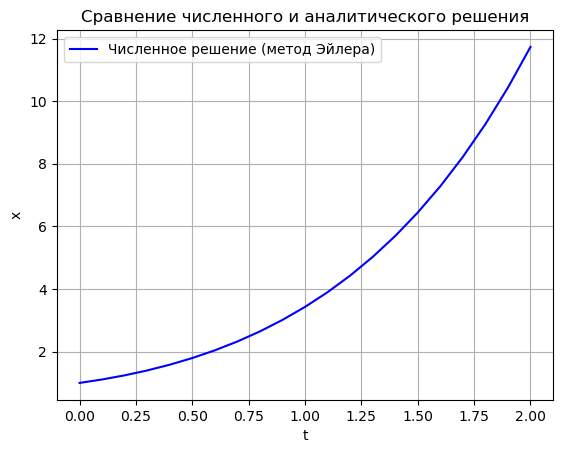

In [75]:
'''
Реализация метода Рунге—Кутты в функции Runge_Kutta_method
'''
def Runge_Kutta_method(fun, t, x_0, dt, args={}):
    """
    Реализация метода Рунге-Кутты второго порядка.

    Аргументы:
    fun -- функция, задающая правую часть уравнения
    t -- список с границами отрезка (t_0, T)
    x_0 -- начальное значение (вектор)
    dt -- шаг (hk)
    args -- дополнительные аргументы для функции fun (словарь)
    Возвращает:
    t_values -- массив точек разбиения
    x_values -- массив приближенных значений решения
    """
    # Определяем t_k
    n_steps = int((t[1] - t[0]) / dt)
    t_values = np.linspace(t[0], t[1], n_steps + 1)
    # Массив для хранения приближенных решений
    x_values = np.zeros(n_steps + 1)
    
    x_values[0] = x_0  # Устанавливаем начальное условие

    # Параметры метода Рунге-Кутты второго порядка
    b2 = 1 / ((40 % 8) + 1)  # В данном случае: b2 = 1/1 = 1
    a2 = 1/(2 *b2)
    b1 = 1 - b2
    # Основной цикл метода Рунге-Кутты
    for i in range(len(t_values) - 1):
        t_k = t_values[i]
        x_k = x_values[i]
        
        # Этапы метода Рунге-Кутты
        k1 = fun(t_k, x_k, **args)
        k2 = fun(t_k + a2 * dt, x_k + dt * a2 * k1, **args)
        
        # Обновление решения
        x_values[i + 1] = x_k + dt * (b1 * k1 + b2 * k2)

    return t_values, x_values

# Очередная проверка, что код работает
# Параметры задачи
t = [0, 2] 
x0 = 1  # Начальное условие  # Конечное значение x
h = 0.1  # Шаг

# Численное решение методом Эйлера
t_values, x_numerical = Runge_Kutta_method(f, t, x0, h)

# Аналитическое решение


# Построение графиков
plt.plot(t_values, x_numerical, 'b-', label='Численное решение (метод Эйлера)')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Сравнение численного и аналитического решения')
plt.legend()
plt.grid(True)
plt.show()



#### Примеры

Давайте проверим Вашу реализацию на примерах.

###### 1. Оба метода справляются неплохо

Придумайте пример дифференциального уравнения Бернулли c $\alpha = (\mathrm{\text{номер в табличке}}~mod~4) + 1$, для которого Вы можете найти точное решение в явном виде и предложенные методы дают хорошие результаты. Также придумайте некоторые начальные условия и отрезок, на котором ищется решение.

Решите задачу аналитическим (это Вам придется сделать честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---

# Аналитическое решение уравнения

Рассмотрим дифференциальное уравнение:


$y' = y + 2xy$


Разделим переменные:

$\frac{1}{y} \, dy = (1 + 2x) \, dx$

Проинтегрируем обе части:

$\int \frac{1}{y} \, dy = \int (1 + 2x) \, dx$

Результаты интегрирования:


$\ln|y| = x + x^2 + C$

Преобразуем, чтобы выразить $( y )$:


$y = e^{x + x^2 + C}$

Где $( e^C )$ обозначим как новую константу $( C_1 )$:


$y = C_1 e^{x + x^2}$

Из начального условия $( y(0) = y_0 )$, найдем $( C_1 )$:


$C_1 = \frac{y_0}{e^{0 + 0^2}} = y_0$

Таким образом, аналитическое решение уравнения:

$y = y_0 e^{x + x^2}$


In [76]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
    return  x + 2*x*t


In [77]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    ### Место для Вашего решения ###
    C = 1
    return C*np.exp(t**2 + t)


Проведите **анализ** относительно связи величины шага $h$, метода и получившейся ошибки.

> Ваше исследование должно содержать как минимум:
- сравнение ошибок для метода Эйлера с разными значениями шага ($\geqslant 3$),
- сравнение ошибок для метода Рунге-Кутты с разными значениями шага ($\geqslant 3$),
- сравнение методов Эйлера и Рунге-Кутты между собой:
    - разница в ошибках при одинаковых шагах
    - разница в шагах при (приблизительно) одинаковой ошибке


In [78]:
# Функция для вычисления ошибок
def compute_error(t_numeric, t_exact):
    return np.abs(t_numeric - t_exact)


❗ **Место для Вашего решения** ❗

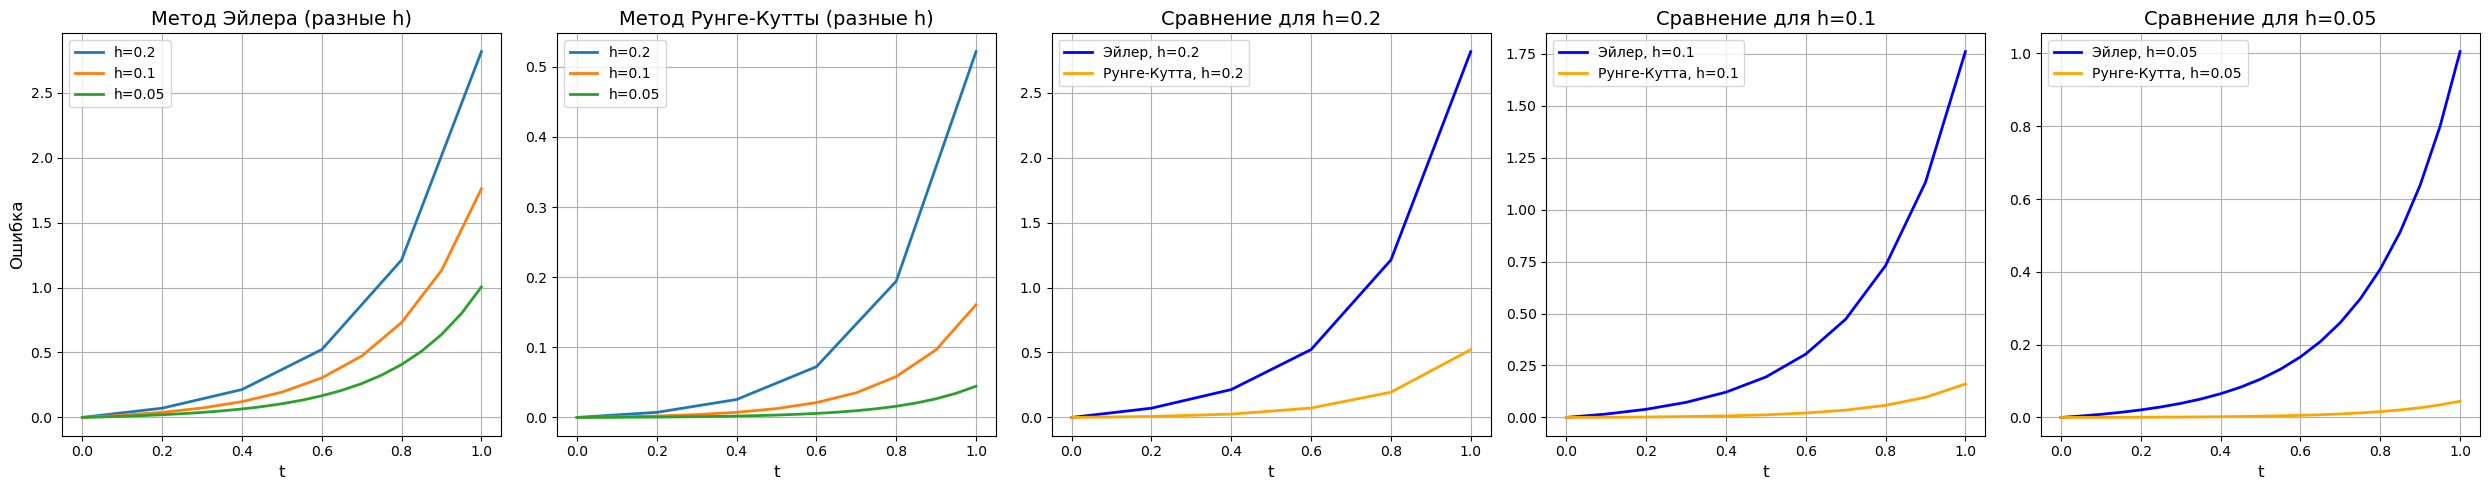

In [79]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

### Место для Вашего решения ###
# Значения шагов h для анализа
h_values = [0.2, 0.1, 0.05]
t = [0, 1] 
x0 = 1  
# Создание фигуры с пятью графиками в одном ряду
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# --- Первый график: сравнение метода Эйлера для разных h ---
for h in h_values:
    t_euler, x_euler = Euler_method(f, t, x0, h)
    x_exact_euler = phi(t_euler)
    error_euler = compute_error(x_euler, x_exact_euler)
    axes[0].plot(t_euler, error_euler, label=f'h={h}', linewidth=2)
axes[0].set_title("Метод Эйлера (разные h)", fontsize=14)
axes[0].set_xlabel("t", fontsize=12)
axes[0].set_ylabel("Ошибка", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True)

# --- Второй график: сравнение метода Рунге-Кутты для разных h ---
for h in h_values:
    t_rk, x_rk = Runge_Kutta_method(f, t, x0, h)
    x_exact_rk = phi(t_rk)
    error_rk = compute_error(x_rk, x_exact_rk)
    axes[1].plot(t_rk, error_rk, label=f'h={h}', linewidth=2)
axes[1].set_title("Метод Рунге-Кутты (разные h)", fontsize=14)
axes[1].set_xlabel("t", fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True)

# --- Третий, четвертый, пятый графики: сравнение Эйлера и Рунге-Кутты при одинаковых h ---
for i, h in enumerate(h_values):
    t_euler, x_euler = Euler_method(f, t, x0, h)
    x_exact_euler = phi(t_euler)
    error_euler = compute_error(x_euler, x_exact_euler)

    t_rk, x_rk = Runge_Kutta_method(f, t, x0, h)
    x_exact_rk = phi(t_rk)
    error_rk = compute_error(x_rk, x_exact_rk)

    axes[i + 2].plot(t_euler, error_euler, label=f'Эйлер, h={h}', linewidth=2, color='blue')
    axes[i + 2].plot(t_rk, error_rk, label=f'Рунге-Кутта, h={h}', linewidth=2, color='orange')
    axes[i + 2].set_title(f"Сравнение для h={h}", fontsize=14)
    axes[i + 2].set_xlabel("t", fontsize=12)
    axes[i + 2].legend(fontsize=10)
    axes[i + 2].grid(True)

# Увеличение расстояния между графиками
plt.tight_layout()
plt.show()



---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что Метод Рунге-Кутты второго порядка показывает более точные результаты даже при больших значениях шага 
ℎ, в то время как метод Эйлера требует значительно меньшего шага для достижения сопоставимой точности. Однако даже при уменьшении шага метод Эйлера продолжает показывать менее точные результаты, особенно на правой части интервала.*
---

###### 2. Метод Эйлера справляется, но лишь сильное уменьшение шага дает адекватную точность. Метод Рунге-Кутты справляется хорошо

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого точности метода Эйлера может не хватить, а метод Рунге-Кутты выручает.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---
---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
---
## Условие задачи

Решить дифференциальное уравнение:

$$
x' = 10(x - \sin(t)) + \cos(t) 
$$

Найти общее решение

## Решение

Перепишем его в более удобном виде:

$$
\frac{dx}{dt} = 10(x - \sin(t)) + \cos(t)
$$

или

$$
\frac{dx}{dt} - 10x = 10\sin(t) + \cos(t)
$$

Это линейное уравнение первого порядка, которое можно решить методом интегрирующего множителя.

Для уравнений вида $\frac{dx}{dt} + p(t) x = q(t)$ интегрирующий множитель $\mu(t)$ вычисляется по формуле:

$$
\mu(t) = e^{\int p(t) dt}
$$

В нашем случае $p(t) = -10$, и интегрирующий множитель:

$$
\mu(t) = e^{\int -10 dt} = e^{-10t}
$$

Теперь умножим обе части уравнения на $e^{-10t}$:

$$
e^{-10t} \frac{dx}{dt} - 10 e^{-10t} x = (10 \sin(t) + \cos(t)) e^{-10t}
$$

Левая часть уравнения — это производная от $x e^{-10t}$:

$$
\frac{d}{dt} \left( x e^{-10t} \right) = e^{-10t} \frac{dx}{dt} - 10 e^{-10t} x
$$

Таким образом, уравнение становится:

$$
\frac{d}{dt} \left( x e^{-10t} \right) = (10 \sin(t) + \cos(t)) e^{-10t}
$$

Теперь интегрируем обе части уравнения:

$$
\int \frac{d}{dt} \left( x e^{-10t} \right) dt = \int (10 \sin(t) + \cos(t)) e^{-10t} dt
$$

После интегрирования получаем:

$$
x e^{-10t} = \sin(t) + C
$$

Теперь умножаем обе части на $e^{10t}$:

$$
x(t) = \sin(t) + C e^{10t}
$$

Таким образом, общее решение уравнения:

$$
x(t) = \sin(t) + C e^{10t}
$$

где $C$ — произвольная константа, которая определяется начальными условиями.

---

❗ **Место для Вашего решения** ❗

In [105]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t, x):
    return 10*(x - np.sin(t)) + np.cos(t)
    ### Место для Вашего решения ###


In [113]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return np.sin(t) + 5 * np.exp(10 * t)

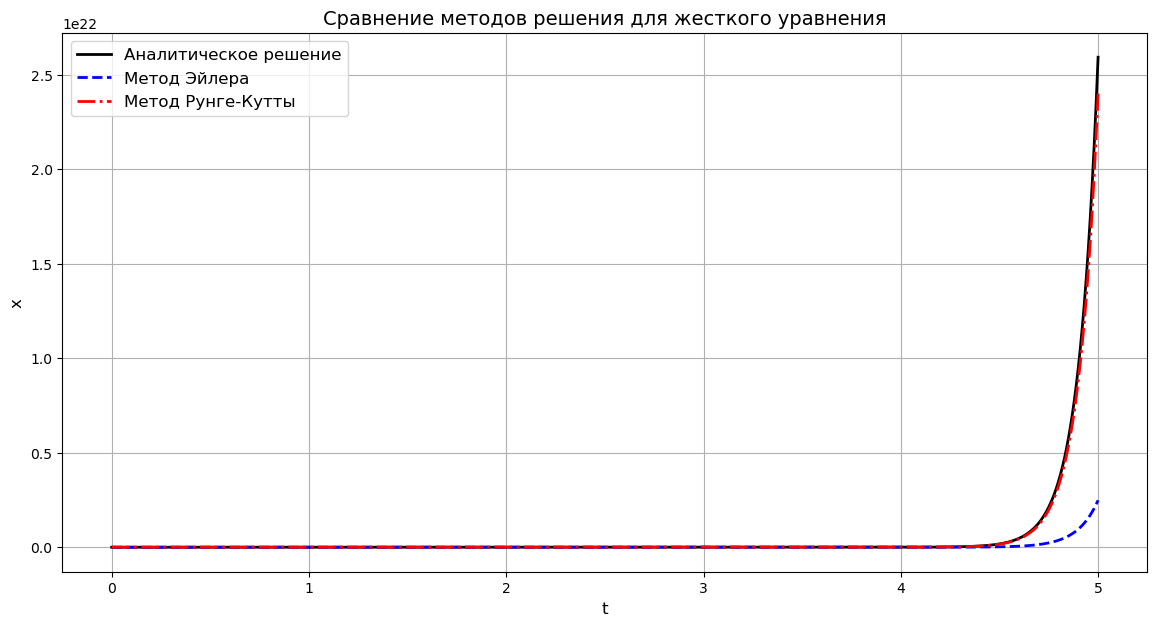

In [114]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

### Место для Вашего решения ###




# Параметры задачи
x0, x_end = 0, 5
y0 = 5
h = 0.01

# Аналитическое решение
x_analytical = np.linspace(x0, x_end, 1000)
y_analytical = phi(np.array(x_analytical))

# Решение численными методами
x_euler, y_euler = Euler_method(f, (x0, x_end), y0, h)
x_rk, y_rk = Runge_Kutta_method(f, (x0, x_end), y0, h)

# Графики
plt.figure(figsize=(14, 7))
plt.plot(x_analytical, y_analytical, 'k-', label="Аналитическое решение", linewidth=2)
plt.plot(x_euler, y_euler, 'b--', label="Метод Эйлера", linewidth=2)
plt.plot(x_rk, y_rk, 'r-.', label="Метод Рунге-Кутты", linewidth=2)
plt.xlabel("t", fontsize=12)
plt.ylabel("x", fontsize=12)

plt.title("Сравнение методов решения для жесткого уравнения", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



Сделайте вывод относительно причин, по которым получается такое поведение методов.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что :
решение, полученное методом Эйлера, заметно отклоняется от аналитического решения, особенно ближе к правой границе области интегрирования (
𝑥
→
5).
Решение, полученное методом Рунге-Кутты второго порядка, буквально совпадает с аналитическим решением на всём интервале, показывая его высокую точность.
При уменьшении шага 
ℎ, метод Эйлера улучшает точность, но это требует значительного увеличения числа шагов, что существенно увеличивает вычислительные затраты. В то же время метод Рунге-Кутты второго порядка достигает высокой точности даже при сравнительно большом шаге.*
---

###### 3. Оба этих метода не справляются с задачей

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого ни метод Эйлера, ни метод Рунге-Кутты не может получить хорошего результата.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---
---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
---
$
y \left( 2 \cos(2x) - 3 \sin(x) + \frac{1}{5} \right) = y'
$

Решаем уравнение, разделяя переменные:

$
\frac{y'}{y} = 2 \cos(2x) - 3 \sin(x) + \frac{1}{5}
$

$
\frac{dy}{y} = \left( 2 \cos(2x) - 3 \sin(x) + \frac{1}{5} \right) dx
$

Интегрируем обе части:

$
\int \frac{1}{y} \, dy = \int \left( 2 \cos(2x) - 3 \sin(x) + \frac{1}{5} \right) dx
$

Левая часть:

$
\int \frac{1}{y} \, dy = \ln|y|
$

Правая часть:

$
\int \left( 2 \cos(2x) \right) dx = \sin(2x), \quad \int \left( -3 \sin(x) \right) dx = 3 \cos(x), \quad \int \frac{1}{5} \, dx = \frac{x}{5}
$

Суммируем интегралы:

$
\ln|y| = \sin(2x) + 3 \cos(x) + \frac{x}{5} + C
$

Переходим к экспоненте:

$
y = e^{\sin(2x) + 3 \cos(x) + \frac{x}{5} + C}
$

Упрощаем, используя $e^C = C_1$:

$
y = C_1 e^{\sin(2x) + 3 \cos(x) + \frac{x}{5}}
$


---

❗ **Место для Вашего решения** ❗

In [120]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t, x):
    return x * (2 * np.cos(2 * t) - 3 * np.sin(t) + 1 / 5)

In [121]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return np.exp(np.sin(2*t) + np.cos(t) + t / 5)


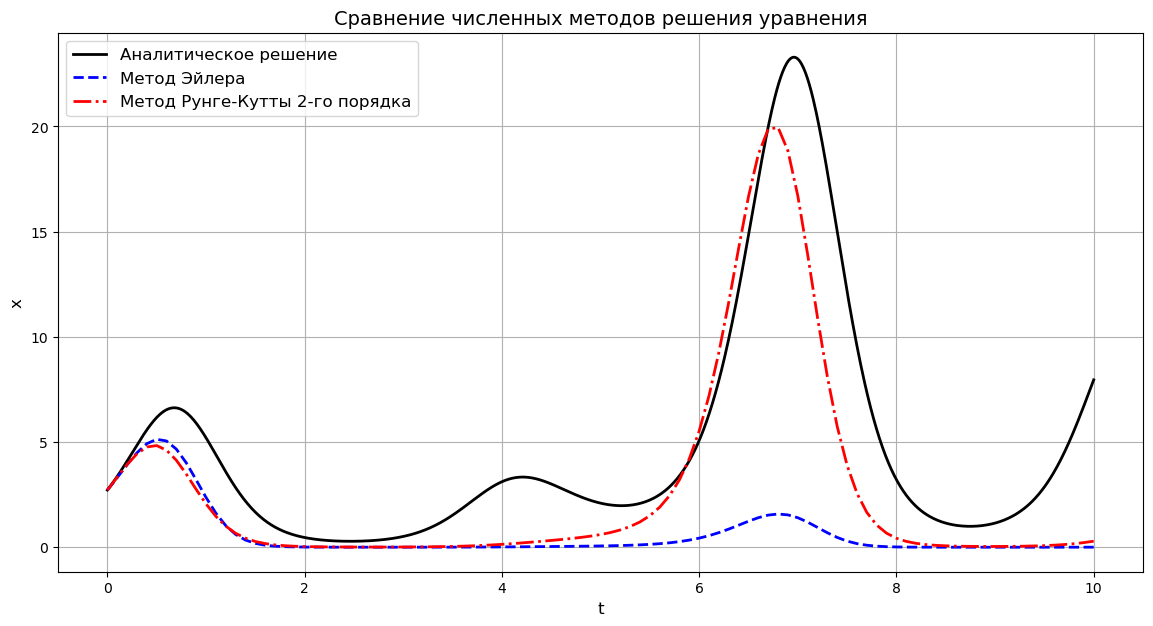

In [125]:
# Параметры задачи
t0, t_end = 0, 10
x0 = 2.71  # Начальное условие
h = 0.1  # Шаг

# Аналитическое решение
t_analytical = np.linspace(t0, t_end, 1000)
x_analytical = phi(t_analytical)
# Численные решения
t_euler, x_euler = Euler_method(f, (t0, t_end), x0, h)
t_rk, x_rk = Runge_Kutta_method(f, (t0, t_end), x0, h)

# Построение графиков
plt.figure(figsize=(14, 7))
plt.plot(t_analytical, x_analytical, 'k-', label="Аналитическое решение", linewidth=2)
plt.plot(t_euler, x_euler, 'b--', label="Метод Эйлера", linewidth=2)
plt.plot(t_rk, x_rk, 'r-.', label="Метод Рунге-Кутты 2-го порядка", linewidth=2)
plt.xlabel("t", fontsize=12)
plt.ylabel("x", fontsize=12)
plt.title("Сравнение численных методов решения уравнения", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что оба численных метода плохо справляются с решением данного уравнения из-за его высокой чувствительности к изменениям начальных условий и резких изменений в поведении решения. Метод Эйлера демонстрирует значительное отклонение из-за своей низкой точности и накопления ошибок, особенно при резких изменениях, характерных для данного уравнения. Метод Рунге-Кутты второго порядка, хотя и более точный, также не справляется с быстрыми пиками из-за недостаточной аппроксимации решений, что требует уменьшения шага, существенно увеличивая вычислительные затраты.*
---

###### 4. Применимость методов для задачи с особым решением

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого существует особое решение.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
Рассмотрим дифференциальное уравнение:  
$  
y' = y^2 - y  
$  

Разделим переменные:  
$  
\frac{1}{y^2 - y} \, dy = dx  
$  

Разложим дробь:  
$  
\frac{1}{y(y - 1)} = \frac{-1}{y} + \frac{1}{y - 1}  
$  

После разделения переменных:  
$  
\left( \frac{-1}{y} + \frac{1}{y - 1} \right) dy = dx  
$  

Интегрируем:  
$  
\int \frac{-1}{y} \, dy + \int \frac{1}{y - 1} \, dy = \int dx  
$  

$  
-\ln|y| + \ln|y - 1| = x + C  
$  

Объединим логарифмы:  
$  
\ln\left|\frac{y - 1}{y}\right| = x + C  
$  

Переходим к экспоненте:  
$  
\frac{y - 1}{y} = e^{x + C}  
$  

Обозначим $e^C = C_1$:  
$  
\frac{y - 1}{y} = C_1 e^x  
$  

Преобразуем:  
$  
1 - \frac{1}{y} = C_1 e^x  
$  

$  
\frac{1}{y} = 1 - C_1 e^x  
$  

$  
y = \frac{1}{1 - C_1 e^x}  
$  

Итоговое решение:  
$  
y = \frac{1}{1 - C_1 e^x}, \quad C_1 \in \mathbb{R}.  
$  

---

❗ **Место для Вашего решения** ❗

In [130]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
    ### Место для Вашего решения ###
    return t**2 - t


In [131]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    ### Место для Вашего решения ###
    return 1/(1 - 2 * np.exp(t))
    


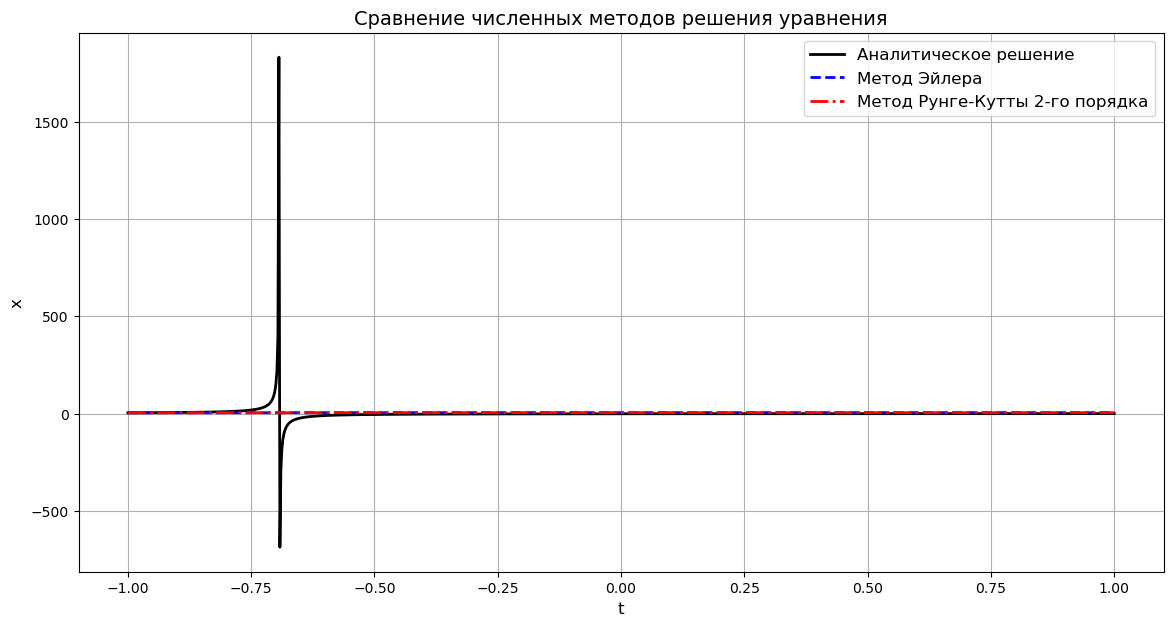

In [133]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

### Место для Вашего решения ###

# Параметры задачи
t0, t_end = -1, 1
x0 = 3.7844 # Начальное условие
h = 0.1  # Шаг

# Аналитическое решение
t_analytical = np.linspace(t0, t_end, 1000)
x_analytical = phi(t_analytical)
# Численные решения
t_euler, x_euler = Euler_method(f, (t0, t_end), x0, h)
t_rk, x_rk = Runge_Kutta_method(f, (t0, t_end), x0, h)

# Построение графиков
plt.figure(figsize=(14, 7))
plt.plot(t_analytical, x_analytical, 'k-', label="Аналитическое решение", linewidth=2)
plt.plot(t_euler, x_euler, 'b--', label="Метод Эйлера", linewidth=2)
plt.plot(t_rk, x_rk, 'r-.', label="Метод Рунге-Кутты 2-го порядка", linewidth=2)
plt.xlabel("t", fontsize=12)
plt.ylabel("x", fontsize=12)
plt.title("Сравнение численных методов решения уравнения", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



Сделайте вывод относительно произошедшего в моделировании и применимости этих методов к задачам с особым решением.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что метод Рунге Кутты второго порядка, а также метод Эйлера плохо справляются с уравнениями, у которых есть особые решения, как видно на графике они буквально игнорируют разрыв второго рода, а также не отображают одно из особых решений ($y = 1$), поэтому я считаю, что использоватть эти методы для нахождения уравнений с особыми решениями нерацианально!*
---

#### \* Дополнительное размышление (Дополнительное задание _по желанию_)

Посмотрите, какие методы могут использоваться для исправления выявленных недостатков приведенных выше методов.

- Опишите кратко теоретические выкладки относительно одного из таких методов.
- Попробуйте объяснить, каким образом предложенный метод помогает бороться с различными недостатками.
- Опишите проблемы, которые появляются (или также проявляются) по сравнению с стандартными методами (Эйлера и Рунге-Кутты).
- Приведите пример, в котором методы Эйлера и Рунге-Кутты не решают задачу, а предложенный в этом пункте метод справляется.

## Задание 2. Восстановление цифр по бракованным картинкам.

В этом пункте мы посмотрим на неожи

### Описание задачи

Вам предоставлен кусок тренировочной выборки из базы данных [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). А также бракованные изображения из этого же датасета.

<p>    
    <center>
    <img src="https://drive.google.com/uc?export=view&id=1jgWvIHwXkhQ1iE6ER0Wy_SLxBvCWW1Dd" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <img src="https://drive.google.com/uc?export=view&id=1AET7slaGnEePLx3qjrxycJSXfHJg55bz" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <em><br>Пример данных из датасета MNIST<br>Сначала: тренировочные изображения,<br>Потом: бракованные изображения</em>
    </center>
</p>

Необходимо, используя простейшую версию [нейронной сети Хопфилда](https://arxiv.org/abs/2008.02217), восстановить цифры на бракованных изображениях.

<p>    
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Hopfield%27s_net.png" alt>
    <em><br>Пример: схема нейронной сети Хопфилда с тремя нейронами</em>
    </center>
</p>

Переписывая заданную в нейронной сети Хопфилда структуру с $m$ нейронами в виде уравнения в матричном виде, можно получить
$$\boxed{x' = A^T \mathrm{softmax}(\beta Ax) - x}, \tag{1}$$
где $A$ — $\text{матрица}_{(m \times n)}$ весов, $\beta \in \mathbb{R}$, $x$ — $\text{вектор}_{(n, 1)}$ входных нейронов, $\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{k} e^{z_k}}$ — функция активации.

А значит, задача применения нейронной сети с известной$^*$ матрицей весов сводится к решению дифференциального уравнения (1).

<sub>$^*$ Матрица с весами нетрудно получается на
основе тренировочных данных, о чем мы поговорим чуть дальше.</sub>

Нам дальше понадобится функция $\mathrm{softmax}(x)$. Реализуйте более удобную далее в применении $\mathrm{softmax}(\beta \cdot x)$ в функции `softmax(x, beta)`, рассматривая $x$ как массив `numpy.array`, а $\beta$ — как число.

In [34]:
'''
Функция softmax(beta*x)
x — numpy.array
beta — число
'''

def softmax(x, beta=1):
    ### Место для Вашего решения ###

    # Ну тут просто по формелe в теории
    exp_x = np.exp(beta * x)
    return exp_x / np.sum(exp_x)


Запишите правую часть уравнения (1), с которым мы дальше будем активно работать, в функцию `dynamics(x, A, beta)`. Используйте в качестве $x$ и $A$ массивы `numpy.array`, а в качестве $\beta$ — число.

In [35]:
'''
Правая часть уравнения (1)
x — numpy.array
A — numpy.array
beta — число
'''

def dynamics(t, x, A, beta):
    ### Место для Вашего решения ###
    """
    Вычисляет правую часть уравнения (1).
    
    t — время (аргумент для совместимости с ODE solver, не используется в расчетах)
    x — numpy.array, текущее состояние системы
    A — numpy.array, матрица взаимодействий
    beta — число, параметр модели
    """
    return np.dot(A.T , softmax(np.dot(A,x), beta)) - x

### Интуитивное понимание принципа работы нейронной сети Хопфилда


#### Простой случай на плоскости

Для того, чтобы понять, почему предложенный выше метод работает, необходимо углубиться в дифференциальное уравнение (1).

Как мы помним, для начального анализа мы можем использовать некоторые графические методы. Например, изоклины, или, в более общем случае, --- векторные поля.

Постройте с помощью [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) векторное поле для уравнения $x' = A^T \mathrm{softmax} (\beta A x)-x$, положив $A = \begin{bmatrix}1&0\\0&1\\-1&-1\end{bmatrix}$, $\beta=5$.

Добавьте на этот же график точки* $(1,0), (0,1), (-1,-1)$.

_* Заметьте, что это просто точки из матрицы $A$, координаты которых находятся в строках этой матрицы_.

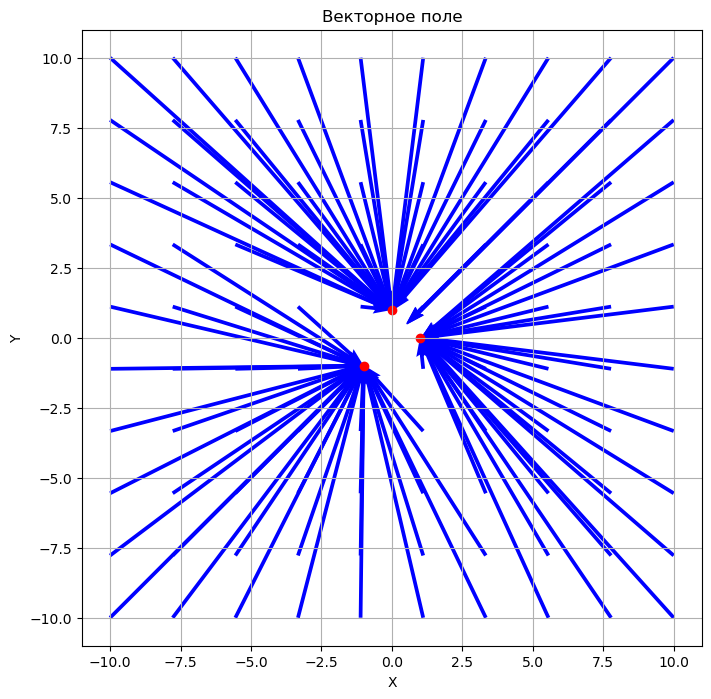

In [36]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
'''

### Место для Вашего решения ###
# Параметры
A = np.array([[1, 0], [0, 1], [-1, -1]])
beta = 5

# Создаю сетку точек для визуализации
x_dots = np.linspace(-10, 10, 10)
y_dots = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x_dots, y_dots)

# Создадим массивы векторов для каждой оси в каждой точке, наполнять будем дальше
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Теперь получается нужно вычислить вектор для каждой точки
for i in range(len(x_dots)):
  for j in range(len(y_dots)):
    # Текущаяя точка
    x = np.array([X[i, j], Y[i, j]])

    # Расчитываем вектор через dynamics
    dx = dynamics(0, x, A, beta)

    # Добавляю в массив векторов
    U[i, j] = dx[0]
    V[i, j] = dx[1]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, scale_units='xy', scale=1, color='b')
# plt.xlim([-10, 10])
# plt.ylim([-10, 10])

# Нужно добавить точки
x_points = [1, 0, -1]
y_points = [0, 1, -1]
plt.scatter(x_points, y_points, color='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Векторное поле')
plt.grid()
plt.show()

Замечаете странное поведение стрелочек? Они как будто смотрят на одну из наших выбранных точек.

Давайте проверим, сохранится ли такое поведение при другой матрице $A$.

Рассмотрите матрицу $A=\begin{bmatrix}2&2\\2&-1\\-3&4\\-4&-3\end{bmatrix}$.

Постройте векторное поле и найдите, какие точки обладают таким же поведением (к ним тянутся стрелочки).


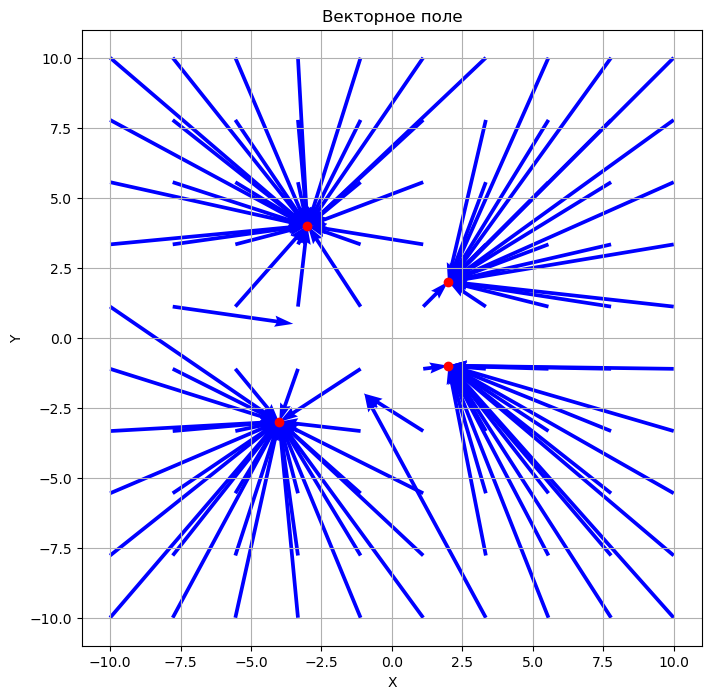

In [37]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,2],[2,-1],[-3,4],[-4,-3]]
beta = 5
'''

### Место для Вашего решения ###
A = np.array([[2,2],[2,-1],[-3,4],[-4,-3]])
beta = 5

# Создаю сетку точек для визуализации
x_dots = np.linspace(-10, 10, 10)
y_dots = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x_dots, y_dots)

# Создадим массивы векторов для каждой оси в каждой точке, наполнять будем дальше
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Теперь получается нужно вычислить вектор для каждой точки
for i in range(len(x_dots)):
  for j in range(len(y_dots)):
    # Текущаяя точка
    x = np.array([X[i, j], Y[i, j]])

    # Расчитываем вектор через dynamics
    dx = dynamics(0, x, A, beta)

    # Добавляю в массив векторов
    U[i, j] = dx[0]
    V[i, j] = dx[1]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, scale_units='xy', scale=1, color='b')
# plt.xlim([-10, 10])
# plt.ylim([-10, 10])

# Нужно добавить точки
x_points = A[:, 0]
y_points = A[:, 1]
plt.scatter(x_points, y_points, color='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Векторное поле')
plt.grid()
plt.show()


Не кажется ли это очень неплохим свойством? Вспомним, что векторное поле показывает как будто бы «направление скорости» нашей системы. А значит, начиная из какой-нибудь точки на плоскости, мы «скатимся» по стрелочкам в одну из заданных нами в матрице $A$ точек.

Подробнее о таком поведении мы поговорим ближе к концу семестра в курсе, а пока стоит понимать это именно на таком интуитивном уровне.


На самом деле, наша система (1) дает даже больше.

Давайте рассмотрим матрицу $A=\begin{bmatrix}2&3\\-3&2\\2&5\\-2&-3\\3&5\end{bmatrix}$. Видно, что несколько предполагаемых "точек притяжения" сгруппированы в первой четверти плоскости.

Постройте векторное поле для уравнения (1), используя данную матрицу, и посмотрите, как наше уравнение справляется с такими сгруппированными точками.

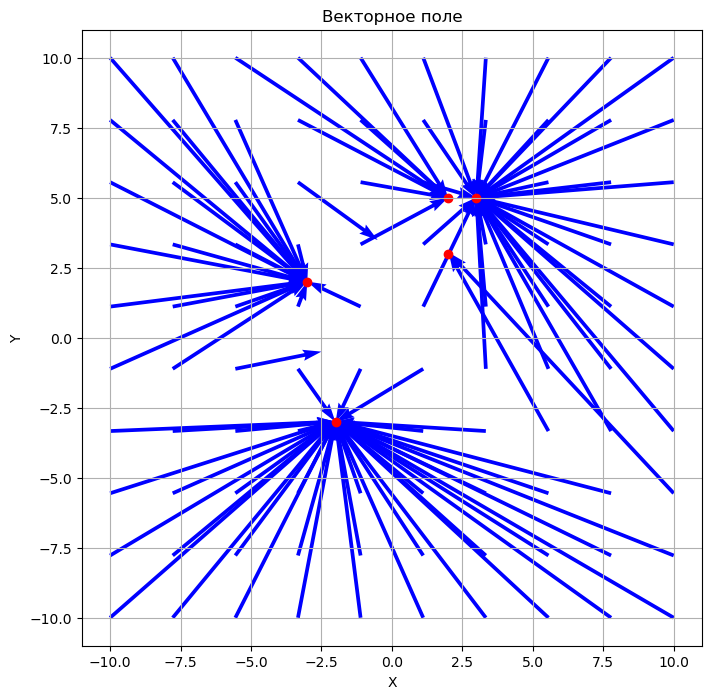

In [38]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,3],[-3,2],[2,5], [-2,-3],[3,5]]
beta = 5
'''

### Место для Вашего решения

# Параметры
A = np.array([[2,3],[-3,2],[2,5], [-2,-3],[3,5]])
beta = 5

# Создаю сетку точек для визуализации
x_dots = np.linspace(-10, 10, 10)
y_dots = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x_dots, y_dots)

# Создадим массивы векторов для каждой оси в каждой точке, наполнять будем дальше
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Теперь получается нужно вычислить вектор для каждой точки
for i in range(len(x_dots)):
  for j in range(len(y_dots)):
    # Текущаяя точка
    x = np.array([X[i, j], Y[i, j]])

    # Расчитываем вектор через dynamics
    dx = dynamics(0, x, A, beta)

    # Добавляю в массив векторов
    U[i, j] = dx[0]
    V[i, j] = dx[1]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, scale_units='xy', scale=1, color='b')
# plt.xlim([-10, 10])
# plt.ylim([-10, 10])

# Нужно добавить точки
x_points = A[:, 0]
y_points = A[:, 1]
plt.scatter(x_points, y_points, color='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Векторное поле')
plt.grid()
plt.show()


Замечательно! Оказывается, что среди этих сгруппированных точек выделяется одна, которая «притягивает сильнее».



Возможно, Вам до сих пор не очень понятно, к чему все эти рассуждения и как они помогут нам с обработкой изображения. Давайте переложим рассмотренные выше идеи на датасет `MNIST`.

#### Отношение к изображениям и цифрам

Вспомним, что картинка в компьютере представляется массивом размера `(height, width)`.

Теперь представьте, что мы рассматриваем распрямленную$^*$ картинку, то есть каждый пиксель записан на новой строчке. Получившийся вектор имеет размер `(width*height,1)`.

И этот вектор мы можем подставлять в наше уравнение (1). Решая это уравнение, получим какой-то вектор новой распрямленной картинки, который мы можем обратно привести к исходному размеру `(height, width)`.

<sub>* Заметьте, что мы не теряем информацию о картинке, если помним изначальные размеры, так как в любой момент можем обратно собрать изображение по распрямленному.</sub>

Остается лишь вопрос в матрице $A$. Какую ее брать?

И оказывается, что тут нам помогут наши «точки притяжения». Ведь если мы знаем на каком-то тренировочном наборе, как примерно выглядят цифры, то можем их положить в матрицу $A$. Таким образом, мы получим, что наши тренировочные картинки являются «точками притяжения» для бракованных. А значит любая бракованная, следуя по стрелочкам векторного поля$^*$, придет к одной из тренировочных картинок, тем самым восстановив цифру на изображении.

То есть матрица $A$ будет выглядеть примерно
$$
A =
\begin{bmatrix}
    \text{тренировочная распрямленная картинка 1}\\
    \text{тренировочная распрямленная картинка 2}\\
    \vdots\\
    \text{тренировочная распрямленная картинка k}\\
\end{bmatrix}.
$$

<sub>* Стоит помнить, что теперь мы все манипуляции проворачиваем в пространстве размерности `width*height`. И там уже, конечно, под векторным полем понимается немного другое и изобразить это практически невозможно.</sub>

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Выборка из датасета производится случайным образом!<br>
    Если Вы хотите работать с одними и теми же данными,<br>то сохраните файл <code>mnist.npz</code> к себе на компьютер <br>и каждый раз добавляйте его в Colab,<br>пользуясь кодом ниже.<br> Тогда данные будут читаться из него.</center></p></td>
  </tr>
</table>

Training Images


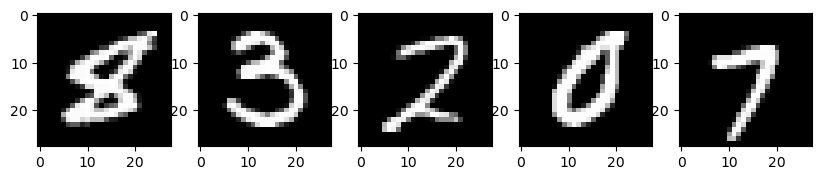

Corrupted Images


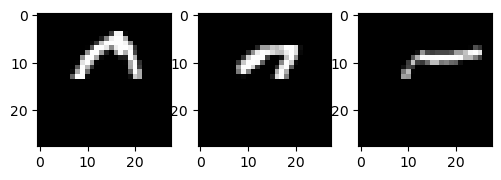

In [39]:
# @title Загрузка выборки из датасета (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }

import os
import torchvision.datasets as datasets
from random import sample

def show_images(images):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    index = 1
    for x in images:
        image = x
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1

if not os.path.exists('/content/mnist.npz'):
    mnist_trainset = datasets.MNIST(root='/content/MNIST', train=True, download=True)
    train = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 5)]
    test = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 3)]
    np.savez('/content/mnist.npz', train=train, test=test)

data = np.load("/content/mnist.npz")
training_img = data["train"]
training_img = np.asarray(training_img)
corrupted_img = data["test"]
corrupted_img_true = data['test']
for i, item in enumerate(corrupted_img):
    corrupted_img[i][14:, :] = 0

print("Training Images")
show_images(training_img)
plt.show()

print("Corrupted Images")
show_images(corrupted_img)
plt.show()

Теперь у нас есть два набора:
- `training_img` — массив с изображениями, представленными в виде массивов $(28\times 28)$,
- `corrupted_img` — массив с бракованными изображениями, представленными в виде массивов $(28\times 28)$.

#### Обработка данных

Как мы выяснили ранее, для работы с изображениями нам необходимо их распрямить, то есть привести к вектору размера $(784 \times 1)$.

Запишите в переменные `training_img_flatten` и `corrupted_img_flatten` массивы распрямленных изображений соответствующих наборов `training_img` и  `corrupted_img`. Выведите получившиеся размеры массивов, используя [`numpy.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

<sub>_Указание:_ воспользуйтесь функцией [`numpy.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)</sub>

Размер training_img_flatten: (5, 784)
Размер corrupted_img_flatten: (3, 784)


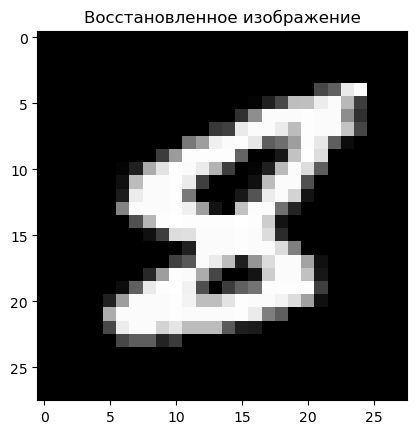

In [40]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, corrupted_img_flatten.
'''


### Место для Вашего решения ###
# Распрямляем массивы
training_img_flatten = training_img.reshape(training_img.shape[0], -1) 
corrupted_img_flatten = corrupted_img.reshape(corrupted_img.shape[0], -1) 

# Выводим размеры массивов
print("Размер training_img_flatten:", np.shape(training_img_flatten))
print("Размер corrupted_img_flatten:", np.shape(corrupted_img_flatten))
count_images, size_images = np.shape(training_img_flatten)

# Здесь я хочу проверить что все правильно, для этого в обратном порядке собираю изображение
image_reshaped = training_img_flatten[0].reshape(28, 28)

# Отобразим восстановленное изображение
plt.imshow(image_reshaped, cmap='gray')
plt.title("Восстановленное изображение")
plt.show()


#### Обучение сети

Основываясь на наших предположениях из интуитивного понимания принципа работы, заполните матрицу $A$. В этом и заключается обучение нашей сети.

In [41]:
'''
Задайте матрицу весов A
'''

### Место для Вашего решения ###
A = training_img_flatten.copy()


$\beta$ зададим равной $10^{-5}$. Вы можете поизменять этот гиперпараметр и написать в выводе, что меняется, или почитать в открытых источниках.

In [42]:
beta = 1e-5

#### Применение обученной сети = решение дифференциального уравнения

Получается, что применение нашей сети сводится к решению задачи Коши с уравнением (1) и начальным условием, равным бракованной картинке, которую мы хотим восстановить. Понятно, что решать ее в явном виде не имеет смысла (по-крайней мере, потому что это система из 784 уравнений с функцией $\mathrm{softmax}$ внутри). Поэтому будем решать численно.

Воспользуйтесь функцией `Euler_method` из первого задания для решения заданной задачи Коши для каждой бракованной картинки с подставленными матрицей $A$ и скаляром $\beta$.

Получившиеся решения запишите в переменные `solution_i`, где $i$ — порядковый номер бракованной картинки (начинается с нуля).

In [43]:
'''
Запишите решения задач Коши в переменные solution_i
'''
t = [0, 10]
dt = 0.01

args = {'A': A, 'beta': beta}
solutions = []

for i, corrupted_img in enumerate(corrupted_img_flatten):

    # Для каждого изображения применяем метод Эйлера для восстановления
    t_list, x_list = Euler_method(dynamics, t, corrupted_img, dt, args=args)

    solution_i = x_list[-1]

    solutions.append(solution_i)


Выведите получившиеся восстановленные изображения бок о бок с исходными бракованными. Как Вы думаете, угадал ли компьютер с цифрой? Сделайте вывод почему.

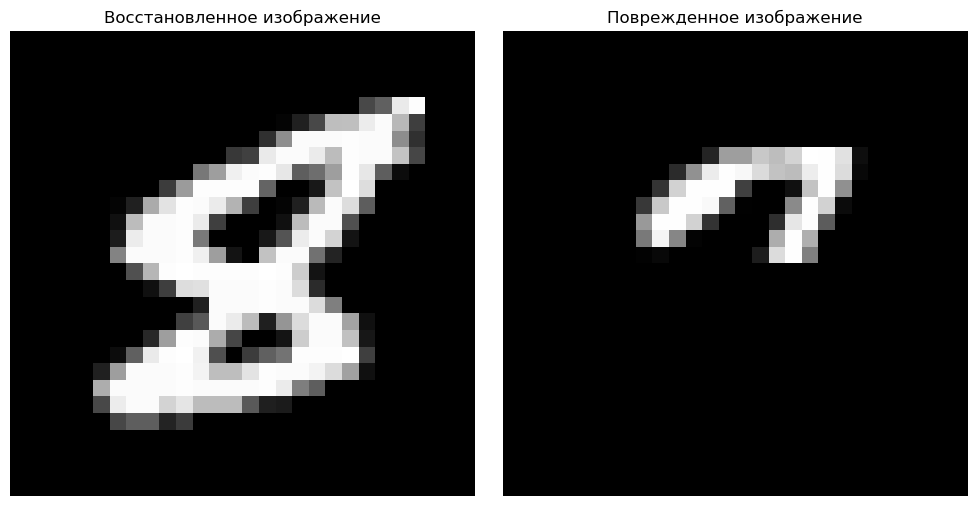

In [44]:
'''
Вывод изображений: бракованное | восстановленное
'''
### Место для Вашего решения ###
# Номер изображений, которые будем выводить
n = 1

# Отображаем восстановленное изображение
solution_img = solutions[n].reshape(28, 28)  # Преобразуем в изображение 28x28


# Выведем какое-то изображение из обучающей и тестовой выборки
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(solution_img, cmap='gray')
plt.title("Восстановленное изображение")
plt.axis('off')

corrupted_image = corrupted_img_flatten[n].reshape(28, 28)  # Преобразуем поврежденное изображение в 28x28
plt.subplot(1, 2, 2)
plt.imshow(corrupted_image, cmap='gray')
plt.title("Поврежденное изображение")
plt.axis('off')

plt.tight_layout()
plt.show()




#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что нейросеть отработала относительно хорошо, потому что она хоть и подгоняет все поврежденные изоюражения под цифру восемь, но это не из-за того что она плохая, она просто недообучена, так как размер обучающей выборки был слишком мал, следовательно при достаточном количесве примеров она бы почти не допускада ошибок.*
---

## Бонус! <sub>но все еще обязательный</sub>

> Я прекрасно знаю, как Вы все любите лабораторные работы с покемонами еще с первого курса.
>
> Поэтому предлагаю свою версию работы про покемонов.

### Описание задачи

Мне кажется, во всем, что связано с покемонами, есть эпизоды, когда по тени необходимо угадать имена покемонов. Именно это и предлагается сделать Вам в бонусном задании.

И, конечно, было бы интересно заставить это делать Вас самих, но лучше попросим об этом волшебную машину с нейронной сетью Хопфилда.

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Картинка тени покемона каждый раз выбирается случайным образом!<br>
    Если Вы хотите написать вывод по конкретному покемону,<br>то сохраните картинки тени и результата к себе на компьютер <br>и вставьте картинки в вывод.</center></p></td>
  </tr>
</table>

Это что за покемон?


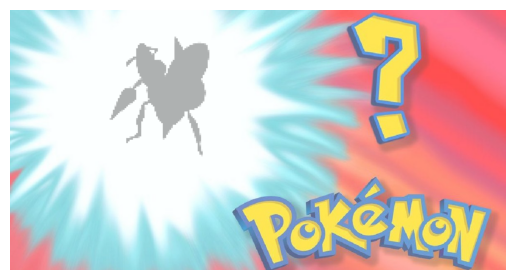

In [45]:
# @title Загрузка покемонов (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }
import matplotlib.image as mpimg
from urllib.request import urlretrieve
from random import choice, sample

background = mpimg.imread(urlretrieve("https://d31xsmoz1lk3y3.cloudfront.net/big/1582671.jpg?v=1558141242", "bg.jpg")[0])

urls = [
    f'https://assets.pokemon.com/assets/cms2/img/pokedex/full/0{i}.png' for i in sample(range(10, 100), 5)
]

training_img = []
shadow_img = []
for url in urls:
    file_name, _ = urlretrieve(url, "test.png")
    img = mpimg.imread(file_name)
    xx = np.linspace(0, img.shape[0] - 1, 80).astype(int)
    yy = np.linspace(0, img.shape[1] - 1, 80).astype(int)
    resized_img = img[xx, :, :][:, yy, :]
    query_img = np.ones(resized_img.shape)
    query_img[:, :, 0] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 1] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 2] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 3] = resized_img[:, :, 3]
    training_img.append(resized_img)
    shadow_img.append(query_img)

training_img = np.asarray(training_img)
shadow_img = choice(shadow_img)
fig = plt.figure(frameon=False)
plt.imshow(shadow_img, origin='lower', extent=[200, 200+4*shadow_img.shape[0],50,50+4*shadow_img.shape[1]])
plt.imshow(background,alpha=0.7)
plt.axis('off')
plt.axis("tight")
plt.axis("image")
print('\033[1m' + 'Это что за покемон?' + '\033[0m')


Теперь в у нас есть:
- `training_img` — массив с цветными изображениями, представленными в виде массивов,
- `shadow_img` — тень какого-то покемона.

#### Обработка данных

Аналогично случаю с изображениями цифр распрямите изображения в массивы.

(5, 80, 80, 4)
(80, 80, 4)
(5, 25600)
(25600,)


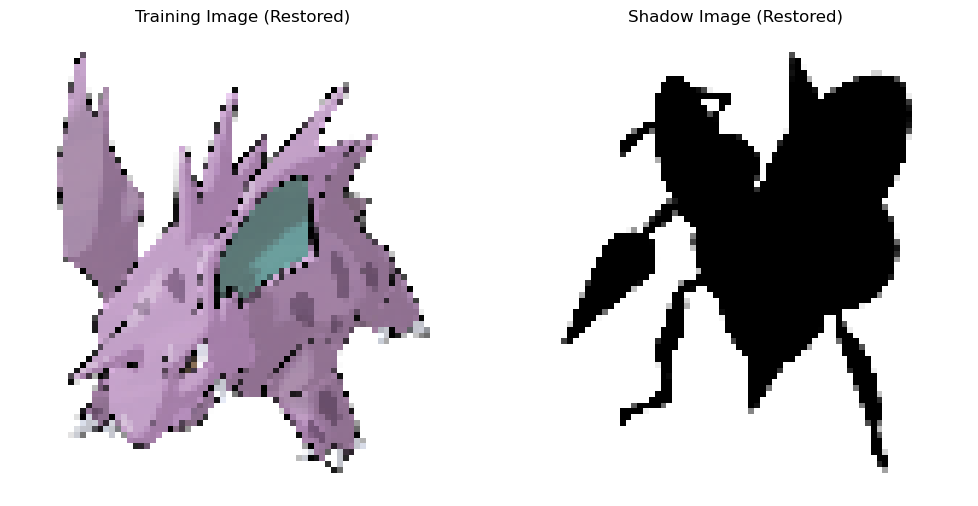

In [46]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, shadow_img_flatten.
'''


### Место для Вашего решения ###
print(training_img.shape)
print(shadow_img.shape)

# Здесь мы распрямляем наши изображения в выборках
training_img_flatten = np.reshape(training_img,(training_img.shape[0], 80* 80* 4))
shadow_img_flatten = np.reshape(shadow_img, (80* 80* 4))

# Здесь я просто вывожу размер массива, чтобы проверить, что все распрямилось
print(np.shape(training_img_flatten))
print(np.shape(shadow_img_flatten))
count_img, size_img = np.shape(training_img_flatten)
# После вывода можно заметить, что в тренировочной выборке у нас 5 изображений
# и в распрямленном виде это 25600 пикселя

# Восстановление исходной формы
training_img_restored = np.reshape(training_img_flatten, (training_img_flatten.shape[0], 80, 80, 4))  # (5, 80, 80, 4)
shadow_img_restored = np.reshape(shadow_img_flatten, (80, 80, 4))  # (80, 80, 4)

# Отобразим оба изображения
plt.figure(figsize=(10, 5))

# Для training_img (цветное)
plt.subplot(1, 2, 1)
plt.imshow(training_img_restored[0])
plt.title("Training Image (Restored)")
plt.axis('off')

# Для shadow_img (черно-белое)
plt.subplot(1, 2, 2)
plt.imshow(shadow_img_restored, cmap='gray')  # Для черно-белого изображения используем cmap='gray'
plt.title("Shadow Image (Restored)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Обучение сети

Обучите сеть, задав матрицу $A$.

In [47]:
'''
Задайте матрицу весов A
'''

### Место для Вашего решения ###
A = training_img_flatten.copy()


In [48]:
beta = 1e-2

#### Применение обученной сети

Примените обученную сеть, чтобы определить* покемона по его тени.

На этот раз воспользуйтесь написанной в первом задании функцией `Runge_Kutta_method`.

&nbsp;
&nbsp;

_* Может так оказаться, что результат будет неузнаваем. Тогда Вам необходимо будет поизменять отрезок, на котором решается уравнение, или гиперпараметр `beta`. Обычно что-нибудь из этого способно помочь._

In [55]:
'''
Запишите решения задач Коши в переменные solution
'''
### Место для Вашего решения ###
def dynamics(t, x, A, beta):
    Ax = np.dot(A, x.T).astype(np.float32)
    Ax -= np.max(Ax, axis=0)  # Стабилизация
    exp_values = np.exp(beta * Ax).astype(np.float32)
    exp_values /= np.sum(exp_values, axis=0, keepdims=True)
    return np.dot(A.T, exp_values).astype(np.float32) - x
## тот у меня так себе работал с веторами, поэтому я сделал другой 
def Runge_Kutta_method(fun, t, x_0, dt, A = None, beta = None):
    t_cur = np.float32(t[0])
    x_cur = x_0.astype(np.float32)

    while t_cur < t[1]:
        k_1 = fun(t_cur, x_cur, A, beta)
        k_2 = fun(t_cur + 0.5 * dt, x_cur + 0.5 * dt * k_1, A, beta)
        x_cur += dt * (0.5 * k_1 + 0.5 * k_2)
        t_cur += dt

    return x_cur

# Начальные данные
t = [0, 10]
dt = 1
args = {'A': A, 'beta': beta}
###ЙЙЙЙЙЙОООООООООУУУУУУУУУУУУУУУУУУУУУУУУУУ
solution = Runge_Kutta_method(dynamics, t, shadow_img_flatten, dt, A, beta)



Выведите результат бок о бок с тенью.

<Figure size 1500x500 with 0 Axes>

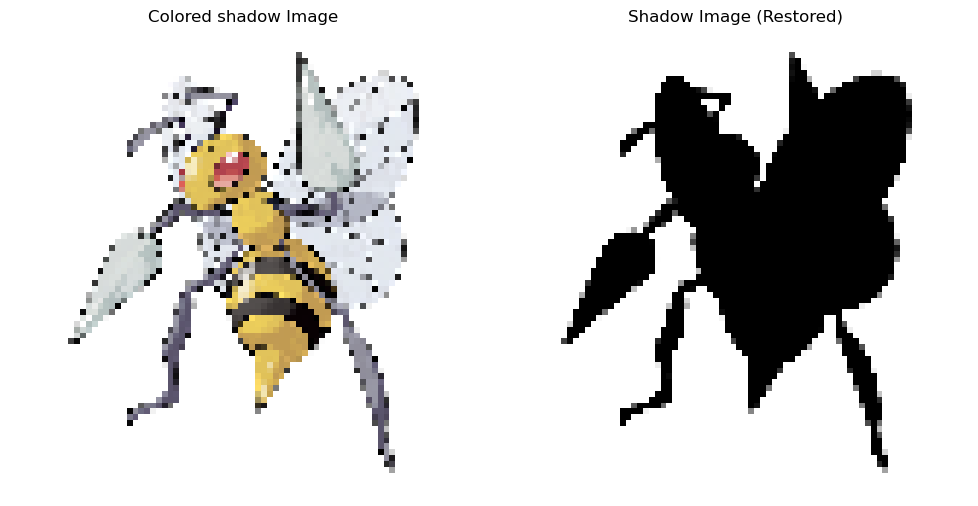

In [56]:
'''
Вывод изображений: тень | покемон
'''
plt.figure(figsize=(15, 5))
# Восстановленное изображение
solution_img = np.reshape(solution, (80, 80, 4))  # Восстановленное изображение
corrupted_image = np.reshape(shadow_img_flatten, (80, 80, 4))  # Поврежденное изображение

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(solution_img)
plt.title("Colored shadow Image")
plt.axis('off')

# Для shadow_img (черно-белое)
plt.subplot(1, 2, 2)
plt.imshow(corrupted_image, cmap='gray')  # Для черно-белого изображения используем cmap='gray'
plt.title("Shadow Image (Restored)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что эта нейростеть в отличие от той, что востанавливала цифры отработала прекрасно, потому что протестировав ее больше пятидесяти раз, она не разу не ошиблась, такой успех обусловлен тем, что в обучающей выборке уже был покемон, которого мы хотели восстановить и поэтому нашей модели достаточно было запомнить коэффициенты.*
---

#### Самая обязательная часть

Ну и, естественно, Вам необходимо узнать имя выпавшего покемона и его способности 😀

~~Ведь в этом суть лабораторных по программированию, разве нет?!~~

---
> ❗ **Место для имени и способностей покемона** ❗
>
> *Мне кажется, что это мне лень фиксировать одного покемона, поэтому оставим это для заинтересованных читателей, кстати можно просто воспользоваться этим сайтом* https://pokemonov.net/pokedex/
---